In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from scipy.stats import poisson, uniform, expon, pareto, binom
from scipy.optimize import minimize
from tqdm import tqdm
from mdptoolbox import mdp, util
import itertools
from scipy.sparse import csr_matrix, lil_matrix
from matplotlib.patches import Patch
import math
import random
import sympy as sp
from sympy.printing.latex import print_latex

In [12]:
def calcPrize(n, p):
    return n*p / (1-((1-p)**n))

In [13]:
ps = np.arange(0.001, 1, 0.001)
xs = np.array([calcPrize(2, p) for p in ps])

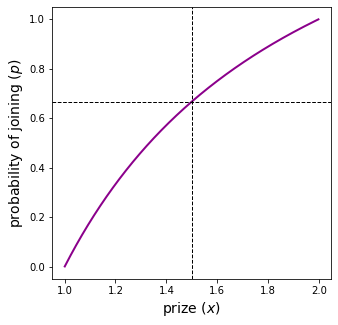

In [14]:
f, ax = plt.subplots(figsize=(5,5))

ax.plot(xs,ps, linewidth=2, color='darkmagenta')
ax.set_xlabel(r'prize ($x$)', size=14)
ax.set_ylabel(r'probability of joining ($p$)', size=14)

ax.axvline(1.5, linewidth=1, color='k', linestyle='--')
ax.axhline(2/3, linewidth=1, color='k', linestyle='--')

plt.savefig('out.png', facecolor='white', dpi=200, bbox_inches='tight')
plt.show()

In [15]:
ps = np.arange(0.001, 1, 0.001)
ns = [2,3,4,5]

xs = []
for n in ns:
    temp = [calcPrize(n, p) for p in ps]
    xs.append(temp)
xs = np.array(xs)
xs.shape

(4, 999)

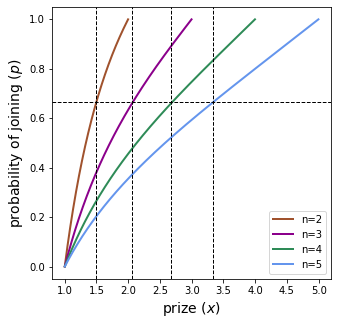

In [16]:
f, ax = plt.subplots(figsize=(5,5))

colors = ['sienna', 'darkmagenta', 'seagreen', 'cornflowerblue']
for i, n in enumerate(ns):
    ax.plot(xs[i], ps, linewidth=2, color=colors[i], label='n={}'.format(n))

ax.set_xlabel(r'prize ($x$)', size=14)
ax.set_ylabel(r'probability of joining ($p$)', size=14)


ax.axhline(2/3, linewidth=1, color='k', linestyle='--')
ax.axvline(1.5, linewidth=1, color='k', linestyle='--')
ax.axvline(2.06, linewidth=1, color='k', linestyle='--')
ax.axvline(2.67, linewidth=1, color='k', linestyle='--')
ax.axvline(3.33, linewidth=1, color='k', linestyle='--')

ax.legend()
plt.savefig('out.png', facecolor='white', dpi=200, bbox_inches='tight')
plt.show()

In [17]:
ns = np.arange(2, 50)
ns

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [18]:
prizeForOne = np.array([calcPrize(n, 1/n) for n in ns])

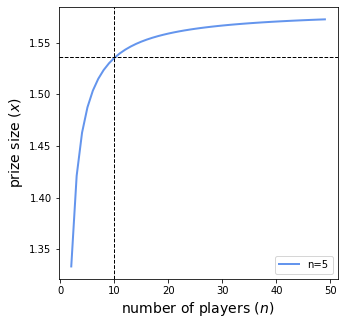

In [19]:
f, ax = plt.subplots(figsize=(5,5))

ax.plot(ns, prizeForOne, linewidth=2, color='cornflowerblue', label='n={}'.format(n))

ax.set_xlabel(r'number of players ($n$)', size=14)
ax.set_ylabel(r'prize size ($x$)', size=14)


ax.axhline(1.536, linewidth=1, color='k', linestyle='--')
ax.axvline(10, linewidth=1, color='k', linestyle='--')

ax.legend()
plt.savefig('out.png', facecolor='white', dpi=200, bbox_inches='tight')
plt.show()

In [20]:
def protocolUtility(n, p, c):
    return c * ((1-p)**n) + n*p

In [21]:
def calcPstar(n, c):
    return 1-(c**(-1/(n-1)))

In [23]:
ps = np.arange(0.001, 1, 0.001)
cs = [1.5, 2, 2.5]

In [24]:
us = []
for c in cs:
    temp = [protocolUtility(2, p, c) for p in ps]
    us.append(temp)
us = np.array(us)
us.shape

(3, 999)

In [25]:
pstars = [calcPstar(n=2,c=c) for c in cs]
xstars = [calcPrize(n=2, p=p) for p in pstars]
ustars = [protocolUtility(n=2, p=pstars[i], c=cs[i]) for i in range(3)]

In [26]:
pstars, ustars

([0.33333333333333337, 0.5, 0.6], [1.3333333333333335, 1.5, 1.6])

In [27]:
protocolUtility(2,0.6,2.5)

1.6

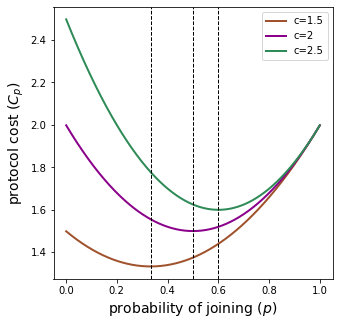

In [28]:
f, ax = plt.subplots(figsize=(5,5))

colors = ['sienna', 'darkmagenta', 'seagreen', 'cornflowerblue']
for i, c in enumerate(cs):
    ax.plot(ps, us[i], linewidth=2, color=colors[i], label='c={}'.format(c))

ax.set_xlabel(r'probability of joining ($p$)', size=14)
ax.set_ylabel(r'protocol cost ($C_p$)', size=14)


ax.axvline(1/3, linewidth=1, color='k', linestyle='--')
ax.axvline(0.5, linewidth=1, color='k', linestyle='--')
ax.axvline(0.6, linewidth=1, color='k', linestyle='--')

# ax.axhline(4/3, linewidth=1, color='k', linestyle='--')
# ax.axhline(1.5, linewidth=1, color='k', linestyle='--')
# ax.axhline(1.6, linewidth=1, color='k', linestyle='--')


ax.legend()
plt.savefig('out.png', facecolor='white', dpi=200, bbox_inches='tight')
plt.show()

In [29]:
def optProtocolCost(n, c):
    return n - (n-1)*(c**(-1/(n-1)))

In [30]:
ns = [2, 4, 8, 16, 32]
cs = np.arange(1, 30, 0.1)

In [31]:
opts = []
for n in ns:
    temp = [optProtocolCost(n, c) for c in cs]
    opts.append(temp)
opts = np.array(opts)
opts.shape

(5, 290)

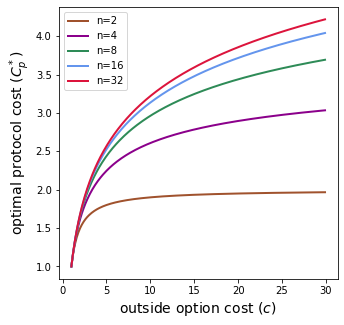

In [32]:
f, ax = plt.subplots(figsize=(5,5))

colors = ['sienna', 'darkmagenta', 'seagreen', 'cornflowerblue', 'crimson']
for i, n in enumerate(ns):
    ax.plot(cs, opts[i], linewidth=2, color=colors[i], label='n={}'.format(n))

ax.set_xlabel(r'outside option cost ($c$)', size=14)
ax.set_ylabel(r'optimal protocol cost ($C_p^*$)', size=14)

# ax.plot(cs, np.log(cs)+1, 'k')

ax.legend()
plt.savefig('out.png', facecolor='white', dpi=200, bbox_inches='tight')
plt.show()

# binomial

In [2]:
def protocolObjective(n, p, c):
    k = int(np.ceil(n/2))
    prize     = n*p /(1-((1-p)**n))
    lowParFee = c * binom.cdf(k, n=n, p=p)
    return prize + lowParFee

In [3]:
cs = [50, 100, 1000]
ps = np.arange(0.001, 1, 0.001)

In [4]:
costs = []
for c in cs:
    temp = [protocolObjective(n=100, p=p, c=c) for p in ps]
    costs.append(temp)
costs = np.array(costs)
costs.shape

(3, 999)

0.001 51.05033352783863
0.606 62.62071002397305
0.65 66.45056147655883


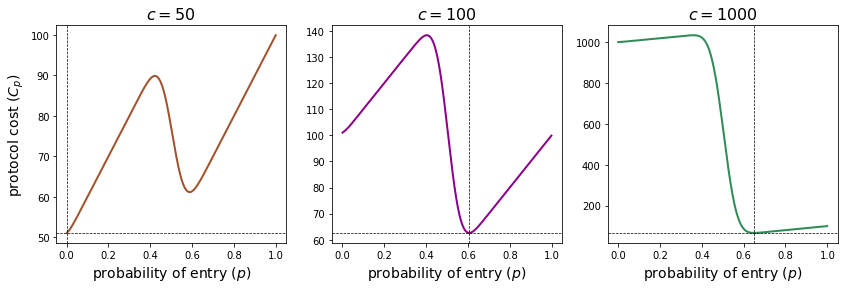

In [5]:
f, axarr = plt.subplots(ncols=3, figsize=(14,4))

colors = ['sienna', 'darkmagenta', 'seagreen']
for i, c in enumerate(cs):
    axarr[i].plot(ps, costs[i], linewidth=2, color=colors[i])
    axarr[i].set_xlabel(r'probability of entry ($p$)', size=14)
    axarr[i].set_title(r'$c={}$'.format(c), size=16)

    optp = ps[np.argmin(costs[i])]
    optcost = np.min(costs[i])
    axarr[i].axvline(optp, color='k', linewidth=0.7, linestyle='--')
    axarr[i].axhline(optcost, color='k', linewidth=0.7, linestyle='--')
    print(optp, optcost)
    
axarr[0].set_ylabel(r'protocol cost ($C_p$)', size=14)
plt.savefig('out.png', facecolor='white', dpi=200, bbox_inches='tight')
plt.show()

In [34]:
cs = np.arange(50, 70, 0.01)
ps = np.arange(0.001, 1, 0.01)

In [35]:
optps, optcosts = [], []
for i, c in tqdm(enumerate(cs)):
    costs = [protocolObjective(n=100, p=p, c=c) for p in ps]
    optp = ps[np.argmin(costs)]
    optcost = np.min(costs)
    optps.append(optp)
    optcosts.append(optcost)
optps, optcosts = np.array(optps), np.array(optcosts)

2000it [00:15, 129.89it/s]


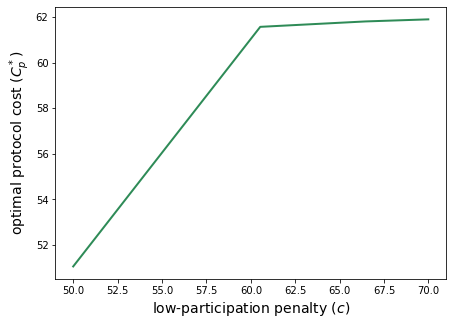

In [36]:
f, ax = plt.subplots(figsize=(7,5))

ax.plot(cs, optcosts, linewidth=2, color='seagreen')
# ax.axvline(60.6, linewidth=1, color='k', linestyle='--')

ax.set_xlabel(r'low-participation penalty ($c$)', size=14)
ax.set_ylabel(r'optimal protocol cost ($C_p^*$)', size=14)

plt.savefig('out.png', facecolor='white', dpi=200, bbox_inches='tight')
plt.show()

In [9]:
def protocolObjective(n, p, c):
    k = int(np.ceil(n/2))
    prize     = n*p /(1-((1-p)**n))
    lowParFee = c * binom.cdf(k-1, n=n, p=p)
    return prize + lowParFee

In [10]:
cs = np.arange(59,70,0.01)
ps = np.arange(0.001, 1, 0.01)

In [11]:
for c in cs:
    print(c, end='\r')
    temp = [protocolObjective(n=100, p=p, c=c) for p in ps]
    optcost = np.min(temp)
    if optcost < c:
        print(c, optcost)
        break

60.60999999999968 60.60747476774159


In [12]:
indiff = [protocolObjective(n=100, p=p, c=60.61) for p in ps]

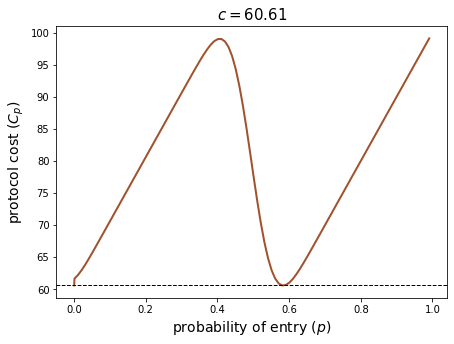

In [15]:
f, ax = plt.subplots(figsize=(7,5))

plx = [0]
plx.extend(ps)
ply = [60.61]
ply.extend(indiff)
ax.plot(plx, ply, linewidth=2, color='sienna')

ax.axhline(60.61, linewidth=1, color='k', linestyle='--')

ax.set_xlabel(r'probability of entry ($p$)', size=14)
ax.set_ylabel(r'protocol cost ($C_p$)', size=14)
ax.set_title(r'$c=60.61$', size=15)


plt.savefig('out.png', facecolor='white', dpi=200, bbox_inches='tight')
plt.show()

# opt ps

In [3]:
cs = np.arange(61, 1000, 10)
ps = np.arange(0.001, 1, 0.001)

In [4]:
optps, optcosts = [], []
for c in tqdm(cs):
    costs = [protocolObjective(n=100, p=p, c=c) for p in ps]
    optp = ps[np.argmin(costs)]
    optcost = np.min(costs)
    optps.append(optp)
    optcosts.append(optcost)
optps, optcosts = np.array(optps), np.array(optcosts)

100%|██████████| 94/94 [00:07<00:00, 12.58it/s]


In [7]:
def p_star(n, c):
    return 0.5 + math.sqrt(max(0.0,      # SQRT-LOG formula
                (math.log(c) - 0.5*math.log(math.pi*n/2)) / (2*n)))

In [ ]:
def protocolObjective(n, p, c):
    k = int(np.ceil(n/2))
    prize     = n*p /(1-((1-p)**n))
    lowParFee = c * binom.cdf(k-1, n=n, p=p)
    return prize + lowParFee

In [18]:
approxps = np.array([p_star(100, c) for c in cs])
approxcosts = np.array([protocolObjective(100, approxps[i], cs[i]) for i in range(len(cs))])

In [19]:
approxcosts

array([61.62710867, 61.95776343, 62.23546954, 62.47419203, 62.68308791,
       62.86847266, 63.03487785, 63.18566035, 63.32337297, 63.45000026,
       63.56711414, 63.67597992, 63.7776305 , 63.87291951, 63.96256015,
       64.04715416, 64.12721362, 64.20317782, 64.27542627, 64.34428901,
       64.41005472, 64.47297734, 64.53328136, 64.59116614, 64.64680953,
       64.70037081, 64.75199314, 64.80180569, 64.84992537, 64.89645828,
       64.94150107, 64.98514193, 65.02746163, 65.06853424, 65.1084279 ,
       65.14720541, 65.18492476, 65.22163961, 65.25739974, 65.29225135,
       65.32623744, 65.35939808, 65.39177067, 65.42339016, 65.45428928,
       65.48449868, 65.51404717, 65.54296179, 65.57126799, 65.59898975,
       65.62614968, 65.65276913, 65.67886826, 65.70446617, 65.72958092,
       65.75422963, 65.77842857, 65.80219314, 65.82553802, 65.84847714,
       65.87102377, 65.89319057, 65.91498957, 65.93643227, 65.95752964,
       65.97829218, 65.99872989, 66.01885237, 66.03866879, 66.05

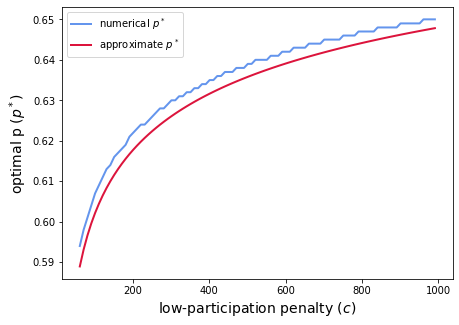

In [22]:
f, ax = plt.subplots(figsize=(7,5))

colors = ['cornflowerblue', 'crimson']
ax.plot(cs, optps, linewidth=2, color=colors[0], label=r'numerical $p^*$')
ax.plot(cs, approxps, linewidth=2, color=colors[1], label=r'approximate $p^*$')

ax.set_xlabel(r'low-participation penalty ($c$)', size=14)
ax.set_ylabel(r'optimal p ($p^*$)', size=14)

ax.legend()
plt.savefig('out.png', facecolor='white', dpi=200, bbox_inches='tight')
plt.show()

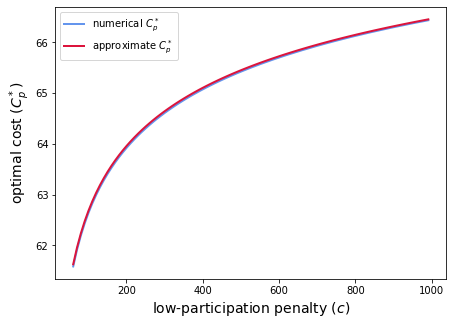

In [24]:
f, ax = plt.subplots(figsize=(7,5))

colors = ['cornflowerblue', 'crimson']
ax.plot(cs, optcosts, linewidth=2, color=colors[0], label=r'numerical $C_p^*$')
ax.plot(cs, approxcosts, linewidth=2, color=colors[1], label=r'approximate $C_p^*$')

ax.set_xlabel(r'low-participation penalty ($c$)', size=14)
ax.set_ylabel(r'optimal cost ($C_p^*$)', size=14)

ax.legend()
plt.savefig('out.png', facecolor='white', dpi=200, bbox_inches='tight')
plt.show()

# Cstar as a function of n

In [40]:
ns = np.arange(10, 1000, 10)

cstars = [c_star(n) for n in ns]

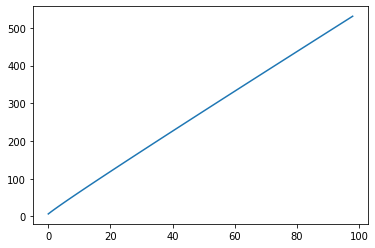

In [41]:
plt.plot(cstars)

In [226]:
optps[190:220]

array([0.001, 0.581, 0.581, 0.581, 0.581, 0.581, 0.581, 0.581, 0.581,
       0.581, 0.581, 0.581, 0.581, 0.581, 0.581, 0.581, 0.581, 0.581,
       0.581, 0.581, 0.581, 0.581, 0.581, 0.581, 0.581, 0.581, 0.581,
       0.581, 0.581, 0.581])

In [227]:
cs[190:220]

array([59.5 , 59.55, 59.6 , 59.65, 59.7 , 59.75, 59.8 , 59.85, 59.9 ,
       59.95, 60.  , 60.05, 60.1 , 60.15, 60.2 , 60.25, 60.3 , 60.35,
       60.4 , 60.45, 60.5 , 60.55, 60.6 , 60.65, 60.7 , 60.75, 60.8 ,
       60.85, 60.9 , 60.95])

In [221]:
from math import comb

In [222]:
comb(100-1, 49-1)

48467410615025936013782474172

In [223]:
1/ (comb(100-1, 49-1) * (49/100)**49 * (1-49/100)**51)

25.63676837273404

In [198]:
optcosts[180:220]

array([60.05033353, 60.10033353, 60.15033353, 60.20033353, 60.25033353,
       60.30033353, 60.35033353, 60.40033353, 60.45033353, 60.50033353,
       60.55033353, 60.56362188, 60.56569042, 60.56775895, 60.56982748,
       60.57189601, 60.57396455, 60.57603308, 60.57810161, 60.58017014,
       60.58223867, 60.58430721, 60.58637574, 60.58844427, 60.5905128 ,
       60.59258134, 60.59464987, 60.5967184 , 60.59878693, 60.60085546,
       60.602924  , 60.60499253, 60.60706106, 60.60912959, 60.61119813,
       60.61326666, 60.61533519, 60.61740372, 60.61947225, 60.62154079])

In [205]:
n=100
p=0.581

In [206]:
n*p /(1-((1-p)**n))

58.099999999999994

In [210]:
k = int(np.ceil(100/2))
c = 60
c * binom.cdf(k-1, n=n, p=p), binom.cdf(k-1, n=n, p=p)

(2.482238674550353, 0.041370644575839215)

In [243]:
import mpmath as mp

def ccrit(n, k):
    """
    Return (c_crit, p_crit) for the lottery with n players and short-fall
    threshold k (= # entrants that avoids the penalty).
    """
    n = int(n);  k = int(k)                 # just to be safe

    # binomial CDF  Pr[M < k]  (sum_{j=0}^{k-1} C(n,j) p^j (1-p)^{n-j})
    def F(p):
        return mp.nsum(lambda j: mp.binomial(n, j) *
                                 p**j * (1-p)**(n-j),
                       [0, k-1])

    # derivative  d/dp Pr[M<k] = -n·C(n-1,k-1) p^{k-1}(1-p)^{n-k}
    def Fprime(p):
        return -n * mp.binomial(n-1, k-1) * \
               p**(k-1) * (1-p)**(n-k)

    # System:
    #   (i)  n + c·F'(p) = 0          (1st-order condition)
    #  (ii)  c = n·p / (1 – F(p))     (indifference with “pay penalty”)
    def system(p, c):
        return (n + c*Fprime(p),
                c - n*p/(1 - F(p)))

    # Robust starting guesses
    p0 = (k + 1)/n          # a bit above k/n
    c0 = n                  # same order of magnitude
    root = mp.findroot(system, (p0, c0))  # 2-D Newton
    p_star, c_star = map(float, root)     # unpack & cast to float
    return c_star, p_star

In [246]:
n, k = 100, 50
ccrit(n, k)

(60.59407650199669, 0.583627984774109)

In [340]:
def p_star(n, c):
    if c <= 0.5*math.sqrt(math.pi*n):          # below c_crit ⇒ stay at p = 0
        return 0.0
    return 0.5 + math.sqrt(max(0.0,      # SQRT-LOG formula
                (math.log(c) - 0.5*math.log(math.pi*n/2)) / (2*n)))

In [343]:
p_star(100, 1000)

0.6479759918592094

In [30]:
def c_star(n, tol=1e-10, max_iter=100):
    """
    Return the critical penalty  c*  that satisfies (★) for the
    given number of players n.

    Parameters
    ----------
    n : int or float
        Number of players.
    tol : float
        Desired absolute accuracy on c* (default 1e-10).
    max_iter : int
        Maximum bisection iterations (default 100).

    Returns
    -------
    float
        The root c*.
    """
    half_n          = 0.5 * n
    sqrt_n_over_2   = math.sqrt(n / 2)
    log_const       = 0.5 * math.log(math.pi * n / 2)

    # domain limit for the square-root term:
    c_min = 0.5 * math.sqrt(math.pi * n) + 1e-12

    # start with a safe bracket
    low  = max(c_min, 0.4 * n)
    high = n                       # will expand if f(high) < 0

    def f(c):
        return c - (half_n +
                    sqrt_n_over_2 *
                    math.sqrt(math.log(c) - log_const))

    # enlarge upper bound until f(high) is positive
    while f(high) < 0:
        high *= 1.5

    # bisection
    for _ in range(max_iter):
        mid = 0.5 * (low + high)
        val = f(mid)
        if abs(val) < tol:
            return mid
        if val > 0:
            high = mid
        else:
            low = mid
    return mid        # best estimate after max_iter iterations


# ---- quick demo ----------------------------------------------------------
for n in [50, 100, 200, 500, 1000]:
    print(f"n = {n:3d} →  c* ≈ {c_star(n):.5f}")

n =  50 →  c* ≈ 30.56326
n = 100 →  c* ≈ 58.79094
n = 200 →  c* ≈ 113.63087
n = 500 →  c* ≈ 273.87241
n = 1000 →  c* ≈ 536.08759
